In [1]:
import lsst.daf.persistence as dafPersist
import re
import lsst.afw.math as afwMath
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def get_mean( calexp):
    mi = calexp.getMaskedImage()
    bad = ~calexp.getMaskedImage().getMask().getPlaneBitMask(['DETECTED' ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.MEAN, sctrl)
    return (stats.getValue(afwMath.MEAN))

def get_threshold(dayDiff, factor=1):
    mi = dayDiff.getMaskedImage()
    bad = dayDiff.getMaskedImage().getMask().getPlaneBitMask(['BAD', 'SAT', 'EDGE', 'NO_DATA', ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.STDEVCLIP, sctrl)
    thres = (stats.getValue(afwMath.STDEVCLIP) * factor)
    return thres

def get_sn(img):
    try:
        sn= get_mean(img)/get_threshold(img)
    except Exception as e:
        sn = 0
    return sn

In [3]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"
butler = dafPersist.Butler(DATADIR+"detect_prod") 

In [4]:
patches = []
patches_file=open(DATADIR+"/patches.txt", "rb")
for line in patches_file:
    line = line.replace('\n','')
    text = re.split("=| ",line)
    patches.append(text[-1])
patches_file.close()



In [5]:
dcoadd_dict = {}
for p in patches:
    if butler.datasetExists("deepCoadd", dataId={"filter":"i", "tract":0, "patch":p}):
            
            dCoadd = butler.get("deepCoadd", dataId={"filter":"i", "tract":0, "patch":p})
            dcoadd_dict[p]=dCoadd

In [6]:
butler_test = dafPersist.Butler(DATADIR+"daycoadd_tests_complete") 
dcoadd_dict_test = {}
for p in patches:
    if butler_test.datasetExists("deepCoadd", dataId={"filter":"i", "tract":0, "patch":p}):
            
            dCoadd = butler_test.get("deepCoadd", dataId={"filter":"i", "tract":0, "patch":p})
            dcoadd_dict_test[p]=dCoadd

In [7]:
len(dcoadd_dict), len(dcoadd_dict_test)

(393, 367)

In [8]:
sn_values = []
for p in patches:
    if dcoadd_dict.has_key(p):
        v1 = get_sn(dcoadd_dict[p])
    else:
        v1 = -1
    if dcoadd_dict_test.has_key(p):   
        v2 = get_sn(dcoadd_dict_test[p])
    else:
        v2 = -1
    if v1!=-1 and v2!=-1:
        sn_values.append([v1,v2])

In [9]:
sn_values = np.array(sn_values)

In [10]:
sn_values

array([[  2.27261331e-01,   2.91441669e-01],
       [  6.48929051e-01,   9.54462177e-02],
       [  4.42462373e-02,   2.50753220e-01],
       [  1.77897634e-01,   1.75607920e-01],
       [  2.10358329e-01,   1.35873372e-01],
       [  2.33662878e-02,   1.70918937e-01],
       [  1.29970922e-01,   1.19226739e-01],
       [  1.36759404e-01,   1.36989465e-01],
       [  3.99487867e-01,   8.65171345e-01],
       [  1.62590569e-01,  -7.07286431e-02],
       [  5.87566226e-02,   1.22759672e-01],
       [  3.80886629e-01,   5.69675670e-01],
       [  2.77898842e-01,   3.79387013e-01],
       [  5.66798486e-01,   6.22153567e-01],
       [  1.94639838e+00,   4.96263625e-01],
       [  2.45739915e-01,   2.95424600e-01],
       [  2.98327050e-01,   3.44062743e-01],
       [  4.93721676e-01,   5.91339329e-01],
       [  4.08848038e-01,   4.96242890e-01],
       [  6.82451173e-01,   5.65460547e-01],
       [  4.46378609e-01,   5.38162655e-01],
       [  8.30625445e-01,   9.41969603e-01],
       [  

In [11]:
control = sn_values[:,0]
test = sn_values[:,1]

(0.0, 50)

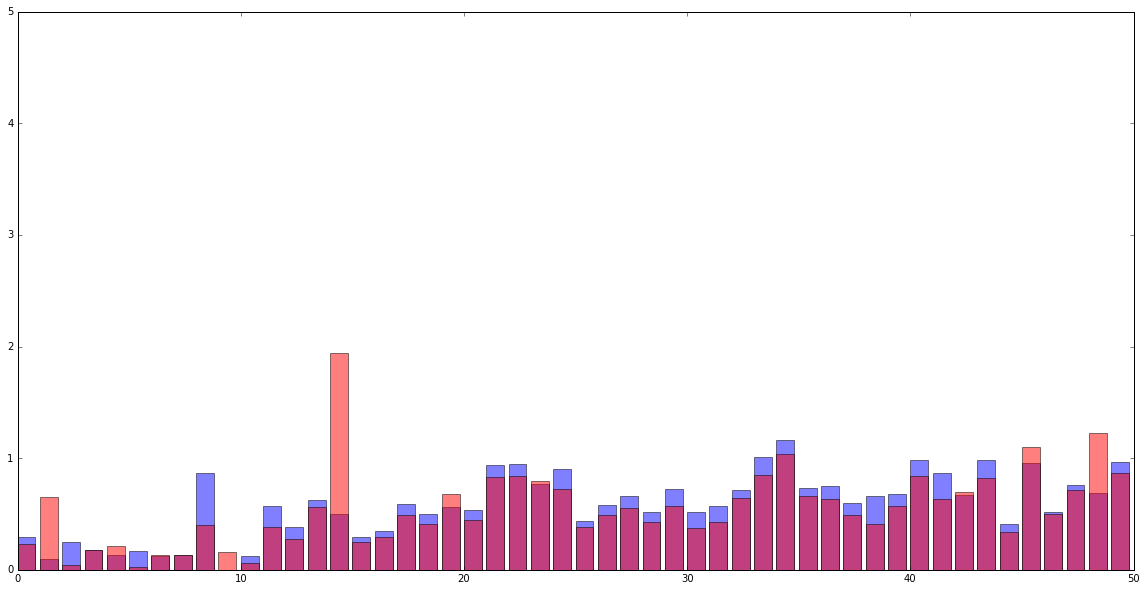

In [12]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmax=50)

(50, 100)

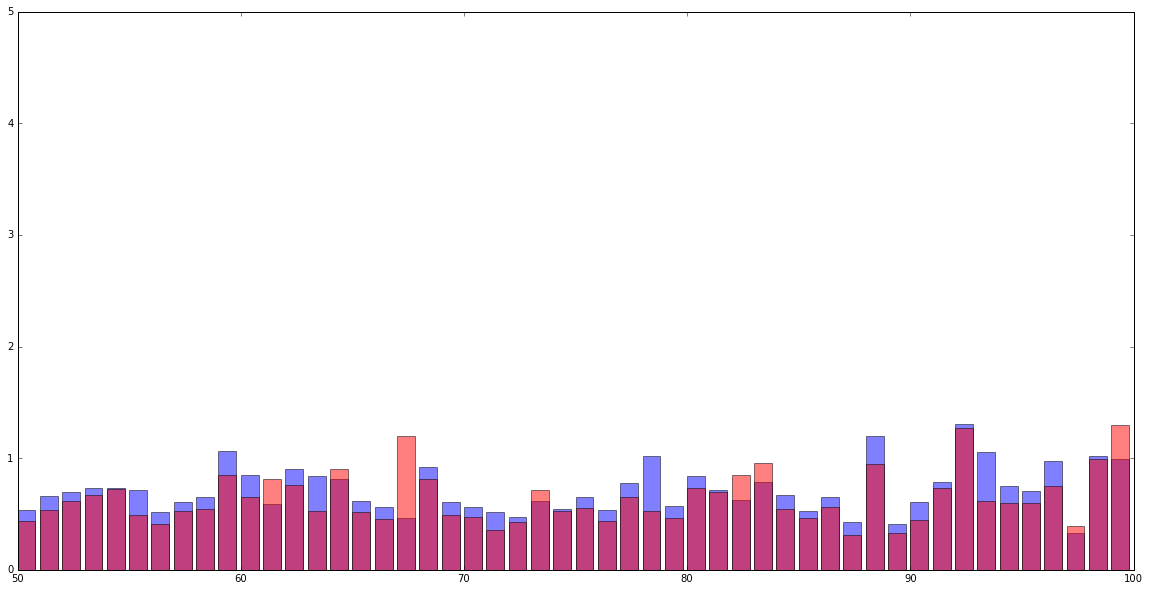

In [13]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=50, xmax=100)

(150, 200)

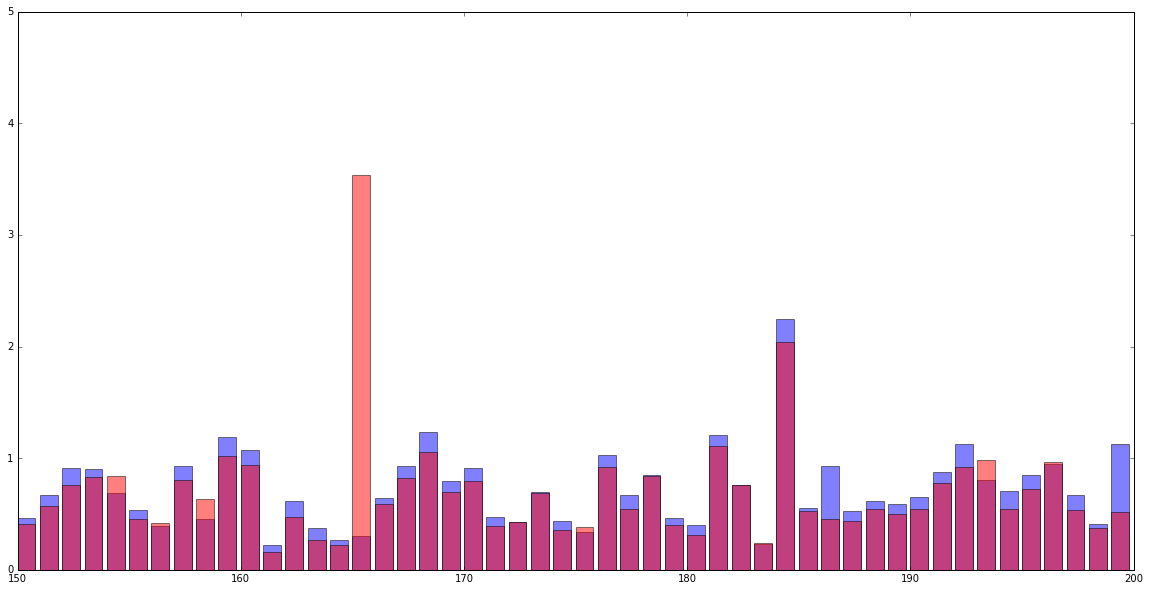

In [14]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=150, xmax=200)

(200, 250)

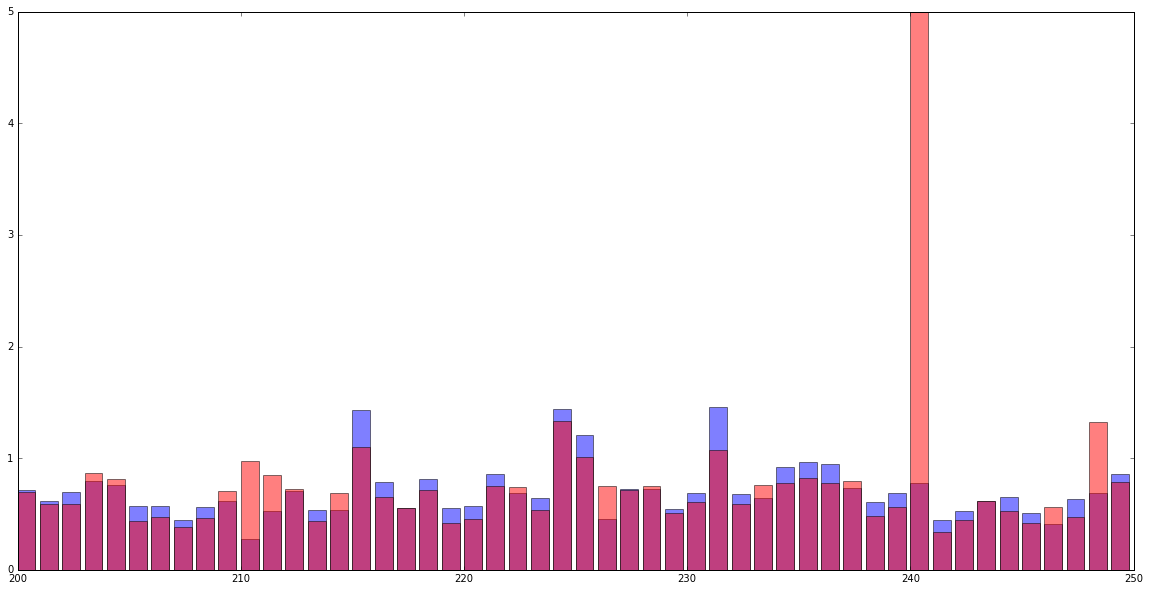

In [15]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=200, xmax=250)

(250, 300)

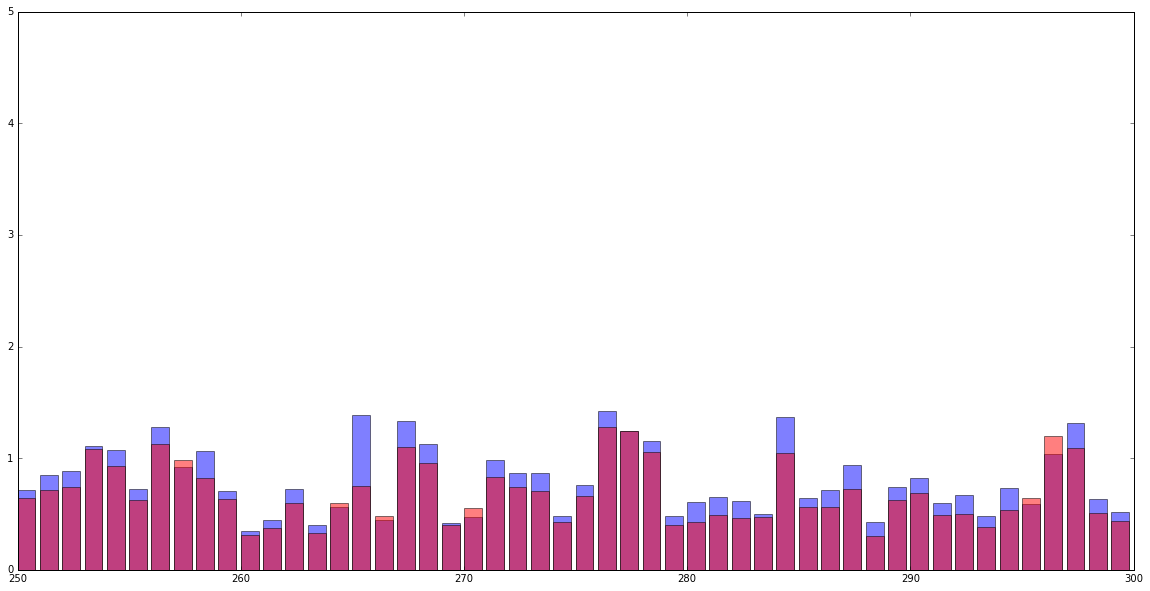

In [16]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=250, xmax=300)